In [1]:
# 📦 Load Ames Housing Dataset directly from GitHub
import pandas as pd

url = "https://raw.githubusercontent.com/josephpconley/R/master/openintrostat/OpenIntroLabs/(4)%20lab4/data%20&%20custom%20code/AmesHousing.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(url)

# Show first few rows
print("✅ Dataset Loaded Successfully!\n")
print(df.shape)
df.head()


✅ Dataset Loaded Successfully!

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# 🧹 Section 2: Cleaning & Initial Feature Engineering

# Check missing values for key columns
# Correcting column names based on the dataframe output from the previous cell
print("\nMissing values in key columns:\n", df[['Gr Liv Area','Overall Qual','SalePrice','Neighborhood']].isnull().sum())

# Log-transform SalePrice for better visualization
import numpy as np # Import numpy for log1p
df['LogSalePrice'] = np.log1p(df['SalePrice'])

# Convert ordinal quality columns to numeric rank
qual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
df['Exter QualNum'] = df['Exter Qual'].map(qual_map)
df['Kitchen QualNum'] = df['Kitchen Qual'].map(qual_map)

print("\nFeature engineering completed. Sample:\n", df[['SalePrice','LogSalePrice','Exter QualNum','Kitchen QualNum']].head())


Missing values in key columns:
 Gr Liv Area     0
Overall Qual    0
SalePrice       0
Neighborhood    0
dtype: int64

Feature engineering completed. Sample:
    SalePrice  LogSalePrice  Exter QualNum  Kitchen QualNum
0     215000     12.278398              3                3
1     105000     11.561725              3                3
2     172000     12.055256              3                4
3     244000     12.404928              4                5
4     189900     12.154258              3                3


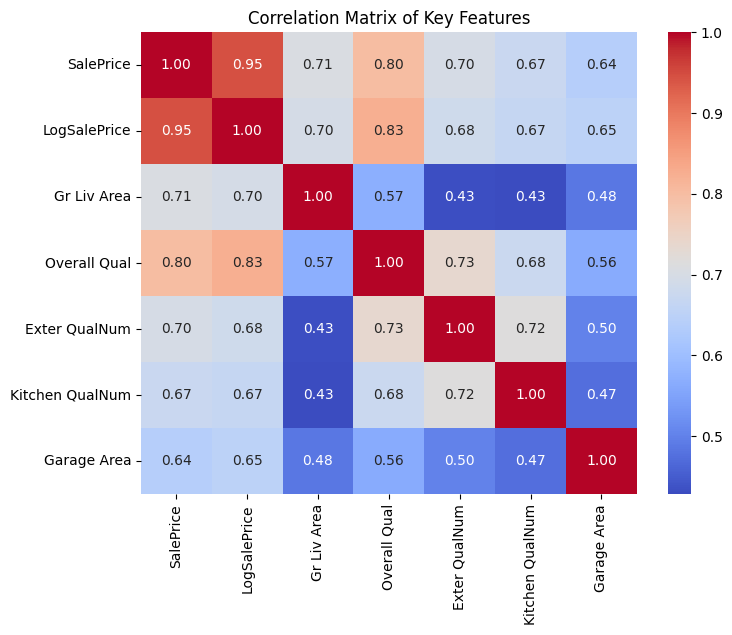

In [6]:
# 🔍 Section 3: Correlation Heatmap — Key Predictors of Price
corr_columns = ['SalePrice','LogSalePrice','Gr Liv Area','Overall Qual','Exter QualNum','Kitchen QualNum','Garage Area']
corr = df[corr_columns].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Features")
plt.show()

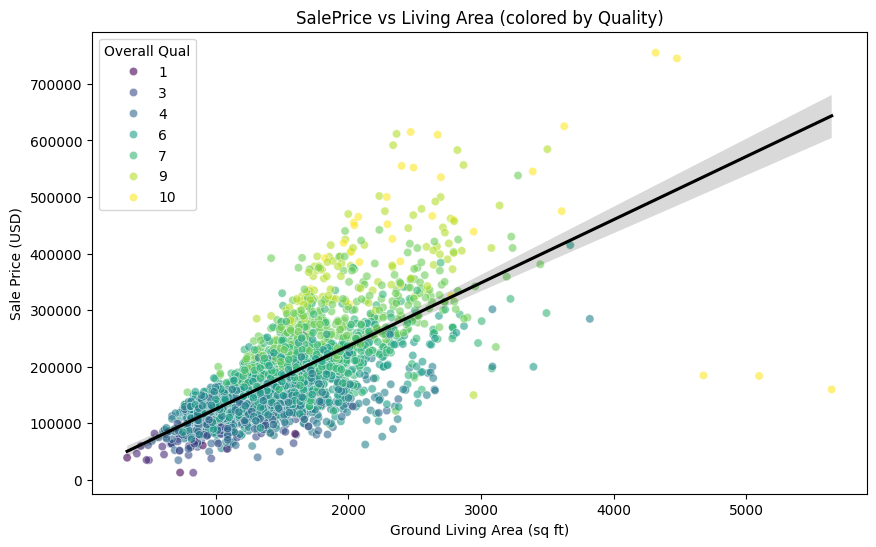

In [8]:
# 📈 Section 4: Price vs Living Area — Scatter + Regression Line
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='viridis', alpha=0.6)
sns.regplot(data=df, x='Gr Liv Area', y='SalePrice', scatter=False, color='black')
plt.title("SalePrice vs Living Area (colored by Quality)")
plt.xlabel("Ground Living Area (sq ft)")
plt.ylabel("Sale Price (USD)")
plt.legend(title='Overall Qual')
plt.show()

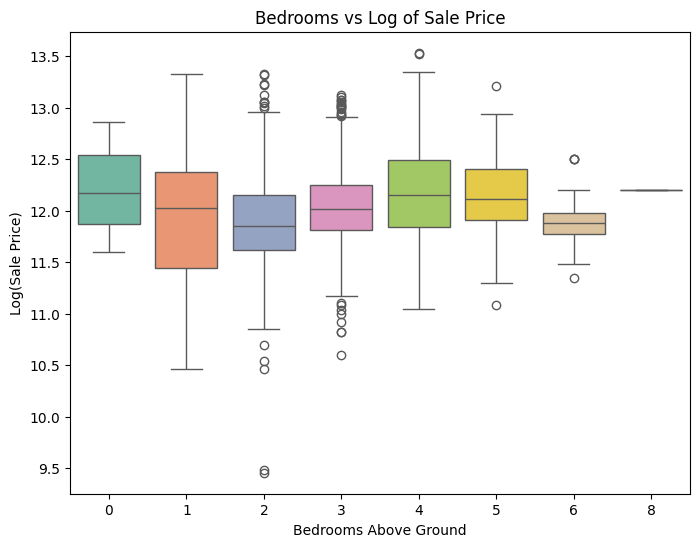

In [11]:
# 🛏 Section 5: Bedrooms vs Log Sale Price — Boxplot for variability
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Bedroom AbvGr', y='LogSalePrice', hue='Bedroom AbvGr', palette='Set2', legend=False)
plt.title("Bedrooms vs Log of Sale Price")
plt.xlabel("Bedrooms Above Ground")
plt.ylabel("Log(Sale Price)")
plt.show()

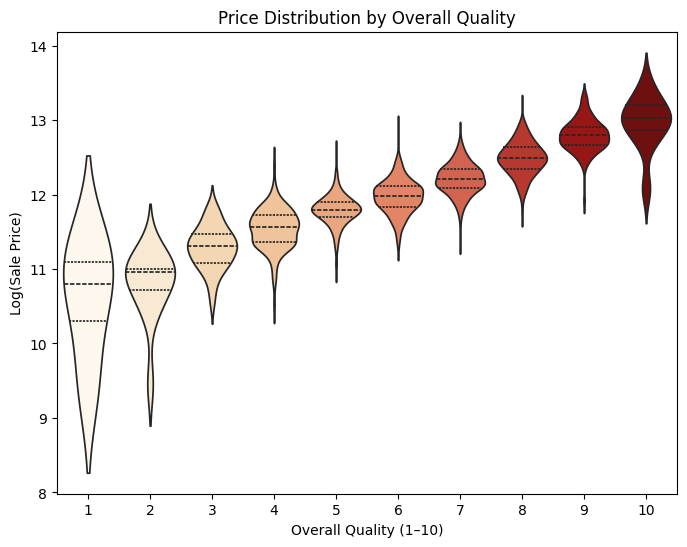

In [16]:
# 🎻 Section 6: Quality Rating vs Price — Violin Plot
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Overall Qual', y='LogSalePrice', inner='quartile', hue='Overall Qual', palette='OrRd', legend=False)
plt.title("Price Distribution by Overall Quality")
plt.xlabel("Overall Quality (1–10)")
plt.ylabel("Log(Sale Price)")
plt.show()

/tmp/ipython-input-690267281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neigh_median.values, y=neigh_median.index, palette='magma')


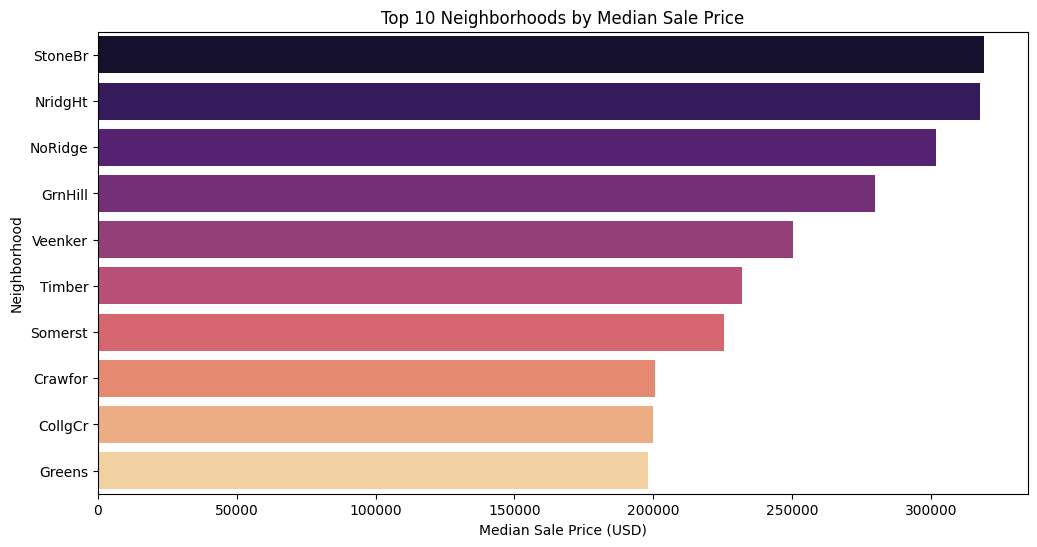


Top 10 neighborhoods by median price:
 Neighborhood
StoneBr    319000.0
NridgHt    317750.0
NoRidge    302000.0
GrnHill    280000.0
Veenker    250250.0
Timber     232106.5
Somerst    225500.0
Crawfor    200624.0
CollgCr    200000.0
Greens     198000.0
Name: SalePrice, dtype: float64


In [15]:
# 📍 Section 7: Neighborhood Impact — Median Sale Price
neigh_median = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=neigh_median.values, y=neigh_median.index, palette='magma')
plt.title("Top 10 Neighborhoods by Median Sale Price")
plt.xlabel("Median Sale Price (USD)")
plt.ylabel("Neighborhood")
plt.show()

print("\nTop 10 neighborhoods by median price:\n", neigh_median)


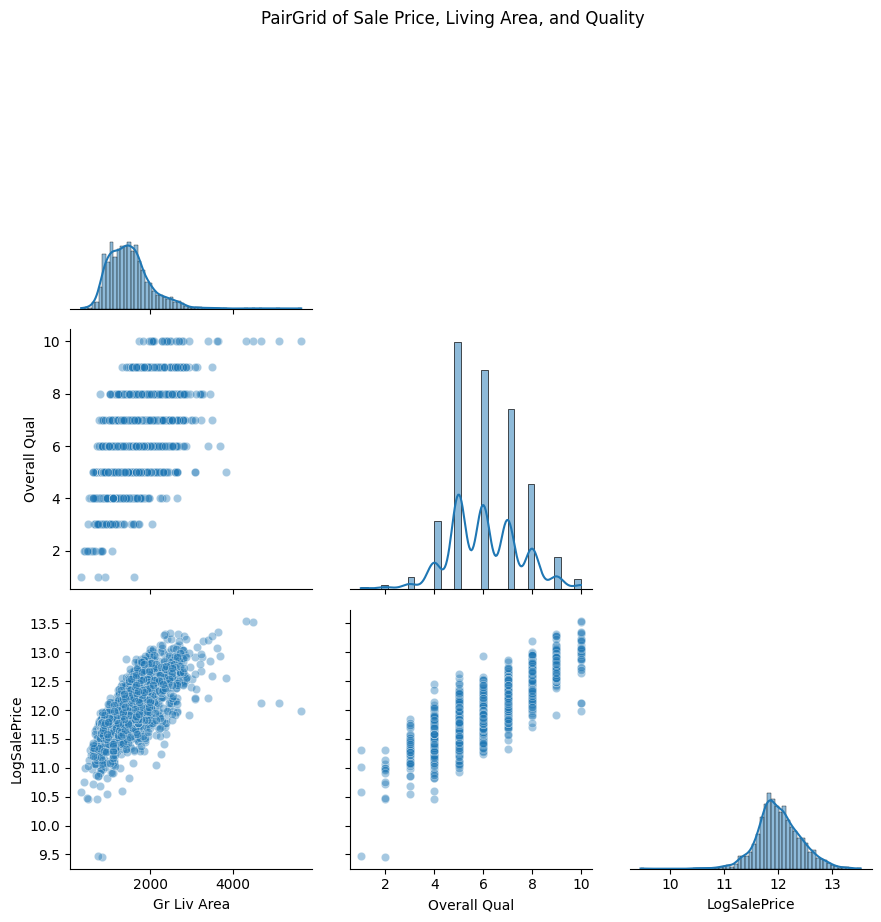

In [18]:
# 🔧 Section 8: PairGrid — Multi-variable Exploratory View
vars = ['Gr Liv Area','Overall Qual','LogSalePrice']
g = sns.PairGrid(df, vars=vars, height=3, corner=True)
g.map_lower(sns.scatterplot, alpha=0.4)
g.map_diag(sns.histplot, kde=True)
g.map_upper(sns.kdeplot, cmap='Blues_d')
plt.suptitle("PairGrid of Sale Price, Living Area, and Quality", y=1.02)
plt.show()

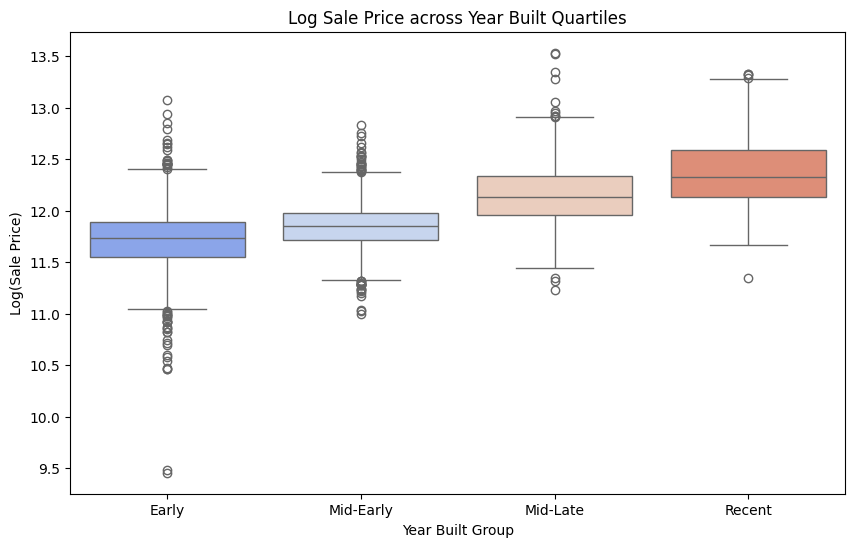

In [21]:
# 📅 Section 9: Year Built Trends — Category vs Price
df['YearBuiltBin'] = pd.qcut(df['Year Built'], 4, labels=['Early','Mid-Early','Mid-Late','Recent'])
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='YearBuiltBin', y='LogSalePrice', hue='YearBuiltBin', palette='coolwarm', legend=False)
plt.title("Log Sale Price across Year Built Quartiles")
plt.xlabel("Year Built Group")
plt.ylabel("Log(Sale Price)")
plt.show()

In [22]:

# 💡 Section 10: Insights Summary & Real-world Implications
print("\n--- Key Insights ---")
print("• Ground living area (GrLivArea) and OverallQual are highly correlated with SalePrice.")
print("• Each step up in quality (OverallQual) shows a clear median price increase — useful for valuation models.")
print("• Price varies significantly by neighborhood; top neighborhoods command premiums of >30%.")
print("• More recently built homes (Recent YearBuilt) show tighter price distributions—important for appraisals.")
print("\n📌 Real-World Applications:")
print("- Real estate agents and appraisers can use these trends for pricing strategy algorithms.")
print("- Investors can target undervalued neighborhoods by comparing features vs price ratios.")
print("- Urban planners can model housing demand and evaluate development projects based on size and quality.")

# Optional export:
# df.to_csv('ames_housing_analysis_output.csv', index=False)



--- Key Insights ---
• Ground living area (GrLivArea) and OverallQual are highly correlated with SalePrice.
• Each step up in quality (OverallQual) shows a clear median price increase — useful for valuation models.
• Price varies significantly by neighborhood; top neighborhoods command premiums of >30%.
• More recently built homes (Recent YearBuilt) show tighter price distributions—important for appraisals.

📌 Real-World Applications:
- Real estate agents and appraisers can use these trends for pricing strategy algorithms.
- Investors can target undervalued neighborhoods by comparing features vs price ratios.
- Urban planners can model housing demand and evaluate development projects based on size and quality.
